In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
#cd /home/roberto/Desktop/romain_ic/wavemixing_project/src

In [3]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonean_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [4]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonean_builder import *
from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from single_and_double_excitations_subspace.QRT_dynamics_ODE import *

from post_processing.local_calculations import *
from helper_functions.cloud import *
from helper_functions.operators import *
from helper_functions.other import * 

In [5]:
b0 = 0.1
N = 7
repeat = False
if repeat == False:
    r_complete = random_cloud(0, N, exc_radius = None, b0 = b0)

### Subspace solutions

In [6]:
R1 = get_nhat_from_angle(25)
R2 = get_nhat_from_angle(205)

tf = 3
Omega = 0.5
Delta = 20
t_span, dt = np.linspace(0,tf,100, retstep = True) 

Exact:

In [7]:
taulist = t_span 


g2_12_by_n_exact = np.zeros(len(r_complete), dtype = "object")
g2_11_by_n_exact = np.zeros(len(r_complete), dtype = "object")
r_list = np.zeros(len(r_complete), dtype = "object")

for i in range(len(r_complete)):
    #r = np.delete(r_complete, 0)
    r = random_cloud(0, i+1, exc_radius = None, b0 = b0)
    r_list[i] = r
    N_atoms = N = len(r)
    S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r_a = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r)
    rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)

    g2_12_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
    g2_11_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R1, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
    
    g2_12_by_n_exact[i] = g2_12_exact
    g2_11_by_n_exact[i] = g2_11_exact

b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array


QRT

In [8]:
g2_12_by_n_QRT = np.zeros(len(r_complete), dtype = "object")
g2_11_by_n_QRT = np.zeros(len(r_complete), dtype = "object")


S_sigmam_i_expectations = None
S_sigmam_ij_expectations = None

for i in range(len(r_complete)):
    #r = random_cloud(0, i+1, exc_radius = None, b0 = b0)
    r = r_list[i] 

    N_atoms = N = len(r)
    Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)
    Beta1D, Beta2D, t_span, r = SolveForBeta1DandBeta2D_tau_QRT(N, kd = None , b0 = None, exc_radius = None, Delta = Delta , Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, taulist=t_span, Sm_1D = S_sigmam_i_expectations, Sm_2D = S_sigmam_ij_expectations )  

    g2_12_QRT = g2_dynamics_subspace_approach( r, R1, R2, taulist, Beta1D, Beta2D)
    g2_11_QRT = g2_dynamics_subspace_approach( r, R1, R1, taulist, Beta1D, Beta2D)
    
    g2_12_by_n_QRT[i] = g2_12_QRT[0]
    g2_11_by_n_QRT[i] = g2_11_QRT[0]
    


Calculate errors

In [9]:
error_g12_QRT_with_exact = [np.average(g2_12_by_n_QRT[i]-g2_12_by_n_exact[i]) for i in range(len(r_complete))]
error_g11_QRT_with_exact = [np.average(g2_11_by_n_QRT[i]-g2_11_by_n_exact[i]) for i in range(len(r_complete))]


error_inf_g12_QRT_with_exact = [g2_12_by_n_QRT[i][-1]-g2_12_by_n_exact[i][-1] for i in range(len(r_complete))]
error_inf_g11_QRT_with_exact = [g2_11_by_n_QRT[i][-1]-g2_11_by_n_exact[i][-1] for i in range(len(r_complete))]

In [10]:
print("cambia numero")

cambia numero


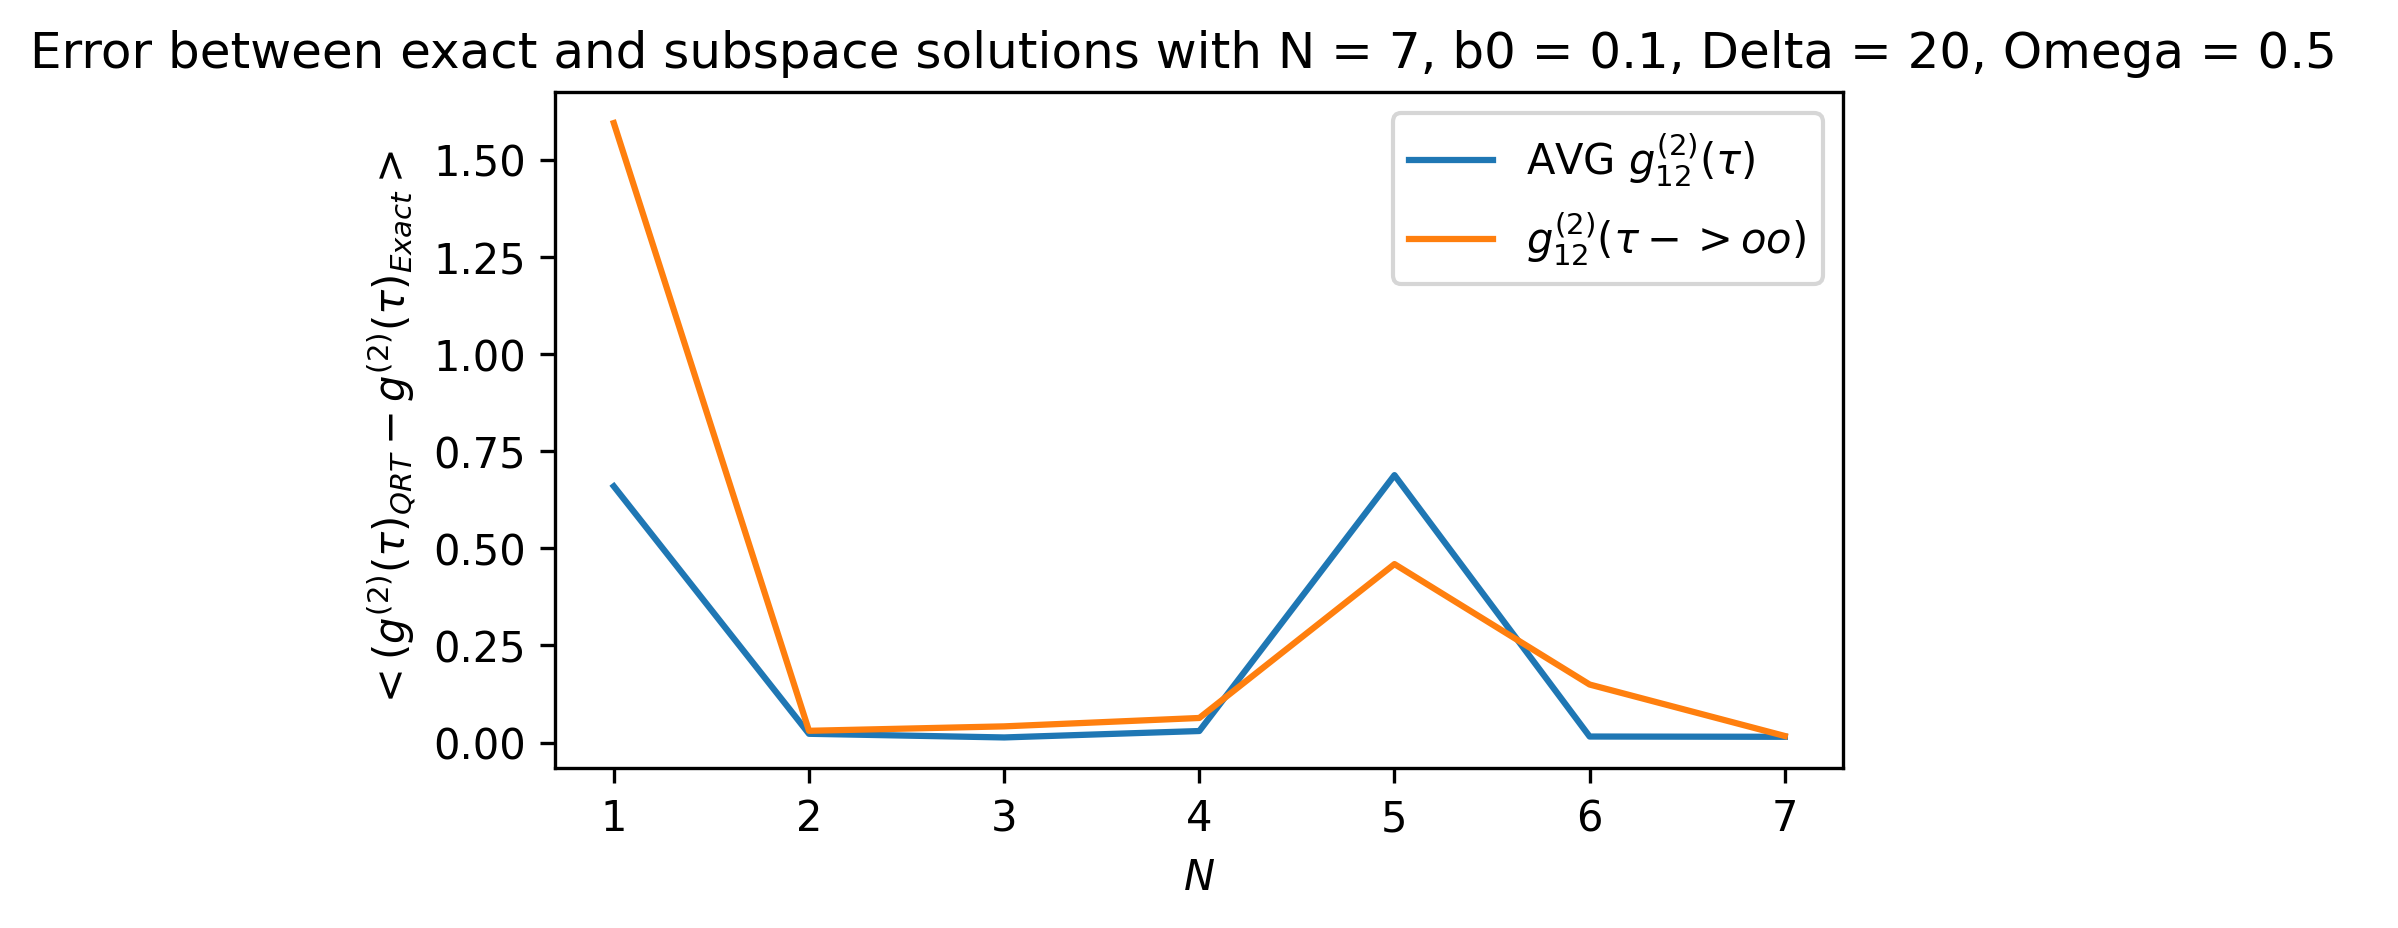

In [11]:
fig = plt.figure(figsize=(5, 3), dpi=300)
run = 14
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3), dpi=300, sharex=True, sharey=True)

#plt.ylim(-0.2,14)
#plt.set_title("Mixed correlation")
plt.plot([i+1 for i in range(len(r_complete))], np.abs(error_g12_QRT_with_exact), label = r'AVG $g^{(2)}_{12}(\tau)$')
#plt.plot([i+1 for i in range(len(r_complete))], np.abs(error_g11_QRT_with_exact), label = 'AVG $g^{(2)}_{11}$')
np.save(f"./benchmarking/Benchmarking_Pictures/comparing_inf_files/Omega_error_g12_QRT_with_exact_run{run}.svg",np.abs(error_g12_QRT_with_exact))

plt.plot([i+1 for i in range(len(r_complete))], np.abs(error_inf_g12_QRT_with_exact), label = r'$g^{(2)}_{12}(\tau->oo)$')
np.save(f"./benchmarking/Benchmarking_Pictures/comparing_inf_files/Omega_error_inf_g12_QRT_with_exact{run}.svg",np.abs(error_g12_QRT_with_exact))

#plt.plot([i+1 for i in range(len(r_complete))], np.abs(error_inf_g11_QRT_with_exact), label = '$g^{(2)}_{11}(\tau->oo)$')



plt.title(f"Error between exact and subspace solutions with N = {N}, b0 = {b0}, Delta = {Delta}, Omega = {Omega}  ")

plt.tight_layout()
plt.xlabel(r"$N$")
plt.ylabel(r"$ <(g^{(2)}(\tau)_{QRT} - g^{(2)}(\tau)_{Exact}>  $")
plt.legend()
plt.savefig(f"./benchmarking/Benchmarking_Pictures/Omega_comparing_inf_error_run{run}.svg", bbox_inches='tight', format='svg')